In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#menghubungkan drive ke colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#membaca dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/gym_members_exercise_tracking.csv')
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


Age : umur

* Gender : Jenis Kelamin
* Weight : Berat Badan
* Height : Tinggi Badan
* Max_BPM : nilai maksimal detak jantung
* Max_BPM : nilai minimal detak jantung
* Resting_BPM : nilai detak jantung saat istirahat
* Session_Duration (hours) : durasi sesi latihan
* Calories_Burned : kalori yang dibakar
* Wrokout_type: tipe workout
* fat_percentage : kadar lemak
* water_intake : kadar air yang masuk pada saat latihan
* workout_freq : frekuensi latihan / minggu
* experience_level : level pengalaman (target)
* BMI





##Exploratory Data Analysis (EDA)

In [ ]:
# melihat dimensi data
df.shape
#disini pada dataframe terdapat 973 baris dan 15 kolom

(973, 15)

In [ ]:
# melihat ringkasan informasi dari data
df.info()
#disini hampir semua datanya bertipe numeric hanya gender yang bersifat object
#dalam knn jika kita mau proses datanya maka kita perlu merubahnya menjadi numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
# melihat jumlah nilai unik
df.nunique()

,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


In [ ]:
# melihat ringkasan statistik deskriptif
df.describe()
#disini kita bisa melihat nilai mean,median , standar deviasi nilai minimal dan maximal dan nilai quartile 25% quartile 1 50% quartile 2 atau mean 75% nilai quartile 3

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
# melihat apakah ada missing value?
df.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [ ]:
# melihat apakah ada data duplikat?
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Height (m)'}>,
        <Axes: title={'center': 'Max_BPM'}>],
       [<Axes: title={'center': 'Avg_BPM'}>,
        <Axes: title={'center': 'Resting_BPM'}>,
        <Axes: title={'center': 'Session_Duration (hours)'}>,
        <Axes: title={'center': 'Calories_Burned'}>],
       [<Axes: title={'center': 'Fat_Percentage'}>,
        <Axes: title={'center': 'Water_Intake (liters)'}>,
        <Axes: title={'center': 'Workout_Frequency (days/week)'}>,
        <Axes: title={'center': 'Experience_Level'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

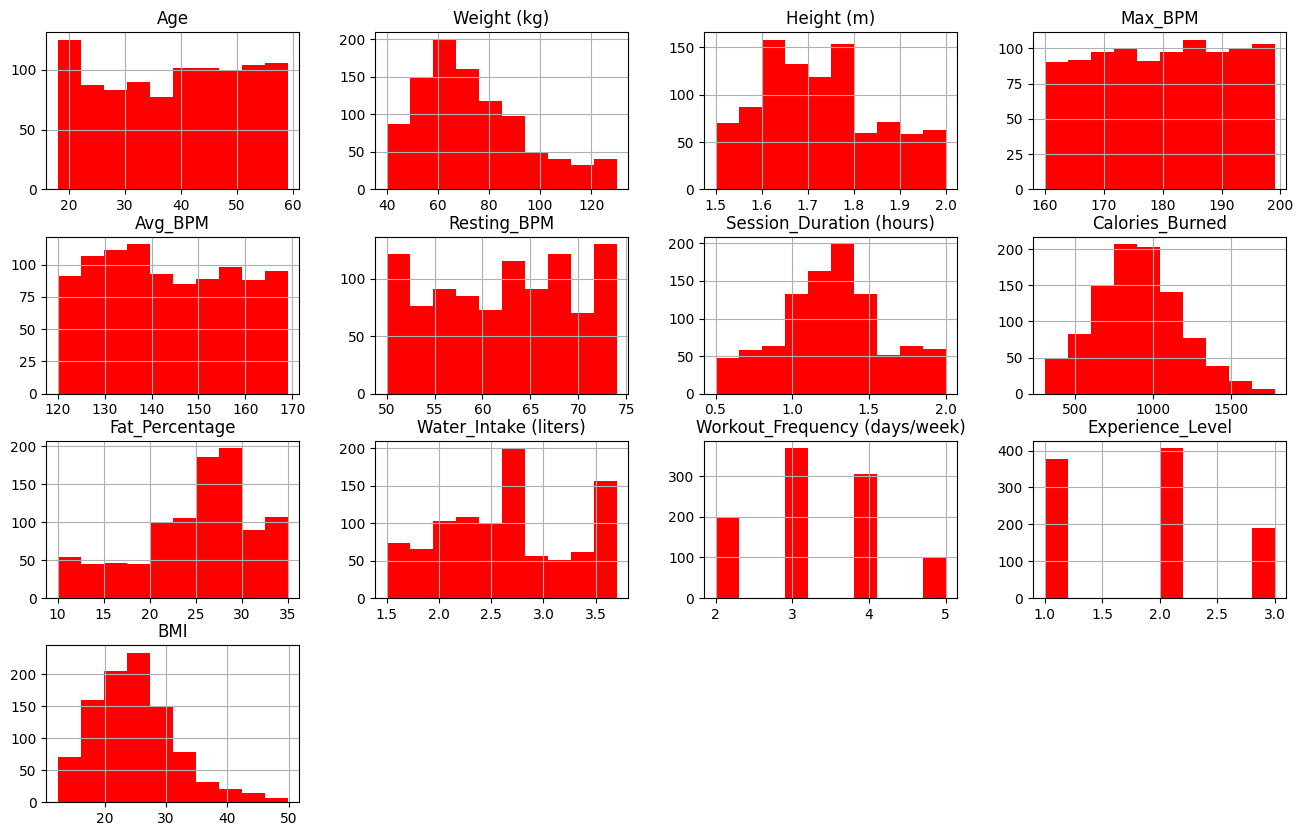

In [ ]:
# melihat distribusi data tiap variabel numerik
df.hist(figsize=(16, 10), color='red')
#kita lihat disini bahwa persebaran datanya banyak yang rata dan ada juga yang positive skew dan yang negative skew

In [ ]:
# melihat nama kolom dalam data
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

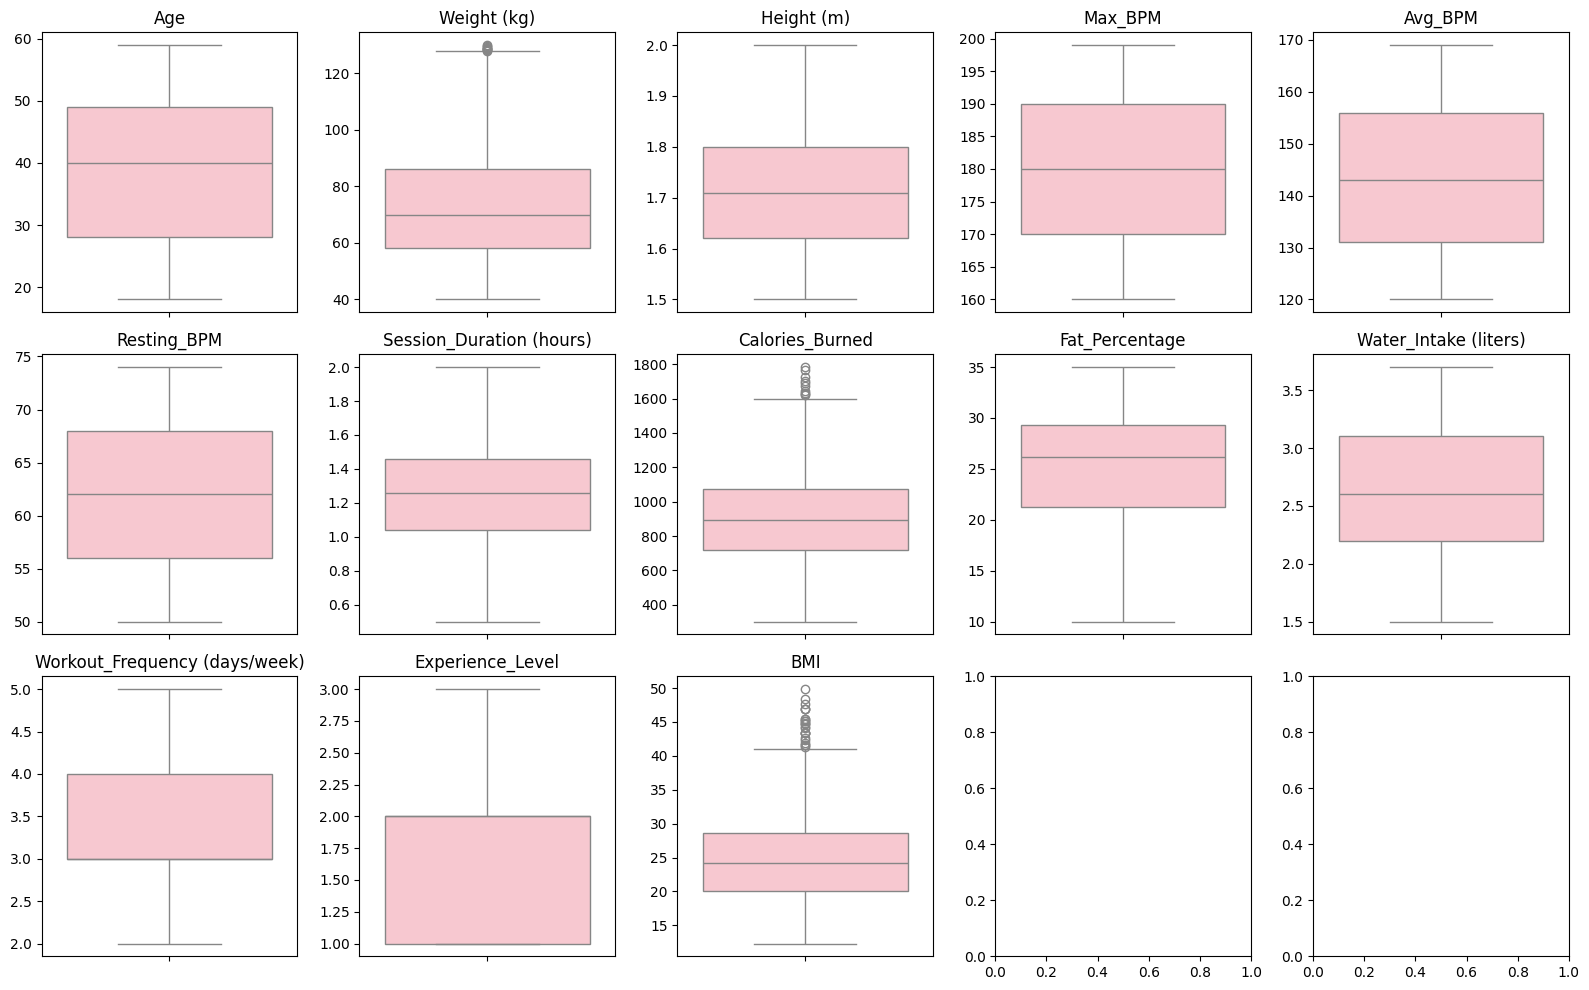

In [ ]:
 # outlier adalah untuk menemukan nilai-nilai yang secara signifikan berbeda atau terlalu jauh dari data lainnya
 #karena algoritma knn ini sangat bergantung pada nilai outlier nilai outlier dapat berpengaruh pada akurasi model nantinya
 def boxplot(df):
  #disini kita mengambil semua kolom yang tipe datanya int64 dan float kita cari nilai outliernya
  var = df.select_dtypes(include=['int64', 'float64']).columns
  fig, ax = plt.subplots(3, 5, figsize=(16,10))
  fig.subplots_adjust(hspace=0.6, wspace=0.6)
  ax = ax.flatten()

  for i, var in enumerate(var):
    sns.boxplot(y=var, data=df, color='pink', ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel("")
  plt.tight_layout()
  plt.show()

boxplot(df)
#ditemukan bahwa yang titik titik itu adalah nilai outliernya maka kita perlu hapus nilai outlier kolom tersebut

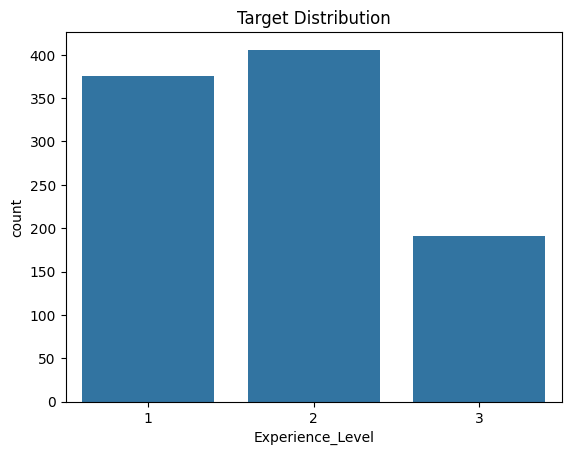

In [ ]:
#disini kita melihat distribusi data untuk kolom experience level yang akan dijadikan sebagai target
#kita lihat disini bahwa distribusi target masih kurang merata maka dari itu kita akan upscaling datanya untuk meningkatkan akurasi dari model yang akan kita buat
sns.countplot(x='Experience_Level', data=df)
plt.title('Target Distribution');

##Data Pre-Processing

In [ ]:
#disini kita akan menghapus outlier dari data kita
def remove_outlier(data):
  #kita mengambil semua kolom dari tabel yang bertipe data int64 dan float yang akan kita apus outliernya
  columns = data.select_dtypes(include=['int64', 'float64']).columns
  cleaned_data = data.copy()
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    cleaned_data = cleaned_data[(cleaned_data[column]>=lower_bound)&(cleaned_data[column]<=upper_bound)]

  return cleaned_data

for i in range(3):
  df = remove_outlier(df)

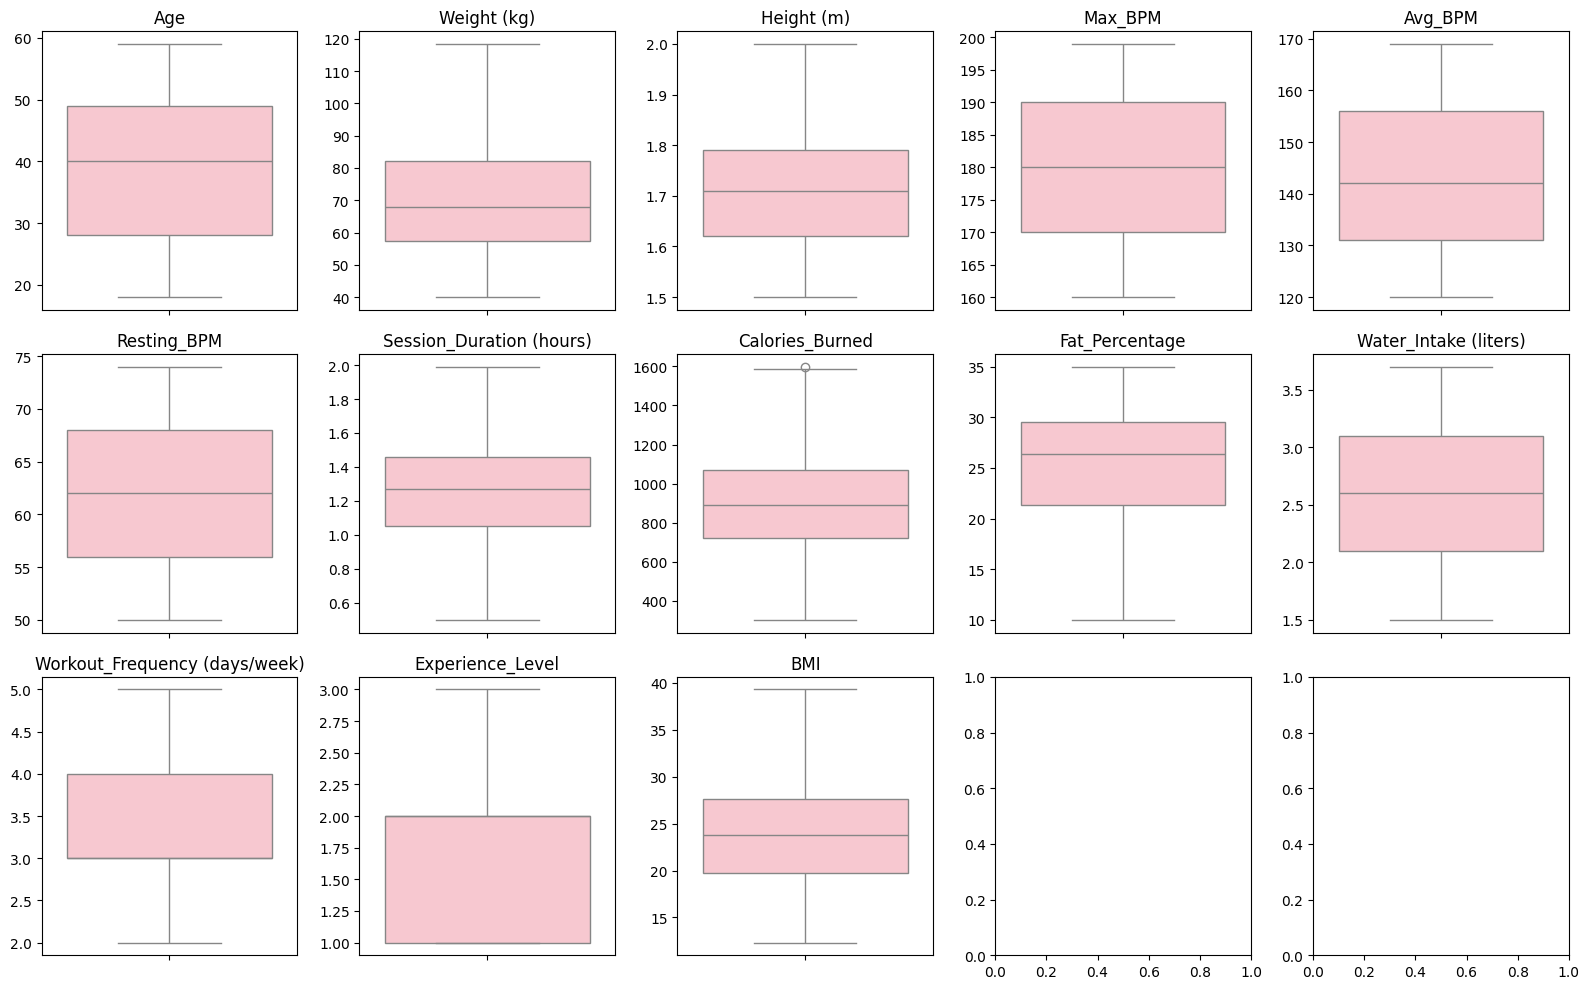

In [ ]:
#disini akan kita cek apakah masih ada data outliernya
boxplot(df)

In [ ]:
#disini kita akan merubah kolom yang tipe datanya object menjadi numeric agar dapat di implemetasikan algoritma knn
le = LabelEncoder()
for var in df.select_dtypes(include=['object']).columns:
    df[var] = le.fit_transform(df[var])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            902 non-null    int64  
 1   Gender                         902 non-null    int64  
 2   Weight (kg)                    902 non-null    float64
 3   Height (m)                     902 non-null    float64
 4   Max_BPM                        902 non-null    int64  
 5   Avg_BPM                        902 non-null    int64  
 6   Resting_BPM                    902 non-null    int64  
 7   Session_Duration (hours)       902 non-null    float64
 8   Calories_Burned                902 non-null    float64
 9   Workout_Type                   902 non-null    int64  
 10  Fat_Percentage                 902 non-null    float64
 11  Water_Intake (liters)          902 non-null    float64
 12  Workout_Frequency (days/week)  902 non-null    int64  


In [ ]:
# memisahkan fitur (independent variables) dari target (dependent variable)
X = df.drop(columns='Experience_Level')
y = df['Experience_Level']
#independen variable adalah variable yang nilainya tidak bergantung pada variable lainnya biasanya ini adalah feature nya
#dependen variable adalah variable yang nilainya bergantung pada variable lainnya biasanya ini adalah targetnya

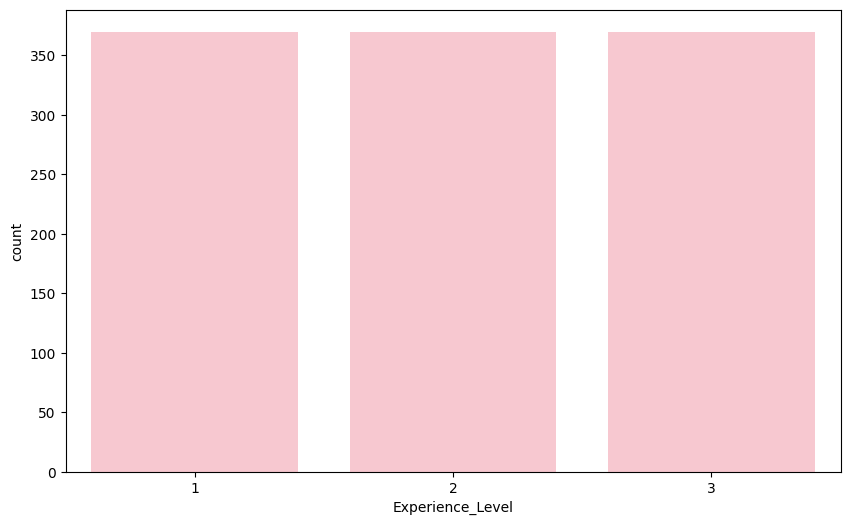

In [ ]:
#karena distribusi data tadi tidak merata dan untuk meningkatkan akurasi kita akna menggunakan smote() untuk mengoversampling datanya
fig = plt.figure(figsize=(10,6))
sm = SMOTE()
X, y = sm.fit_resample(X, y)
sns.countplot(x=y, color='pink')
plt.show()

In [ ]:
# standarisasi fitur (menyamakan skala data fitur)
#kita akan men-scaling datanya jadi range 0 - 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# splitting data dengan membagi 80% data train dan 20% data testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Error Rate')

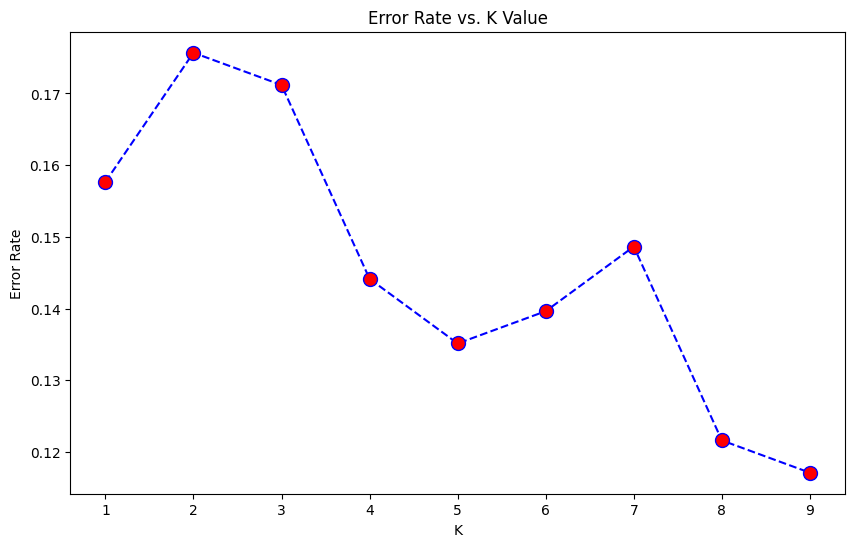

In [ ]:
# menentukan nilai terbaik untuk parameter K (jumlah tetangga)
# dalam algoritma knn kita mencari tetangga yang terbaik bisa menggunakan error rate
#kita disini mencari data dengan error rate paling rendah
#dan untuk neighbornya biasanya ganjil untuk knn
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color="blue", linestyle="dashed", marker="o",
         markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
#disini kita menemukan bahwa 9 adalah k dengan error rate terendah maka kita akan menggunakan k nya adlah 9

##Modeling Data

In [ ]:
# proses modelling
#disini kita menggunakan p1 yang artinya kita menggunaakn manhattan distance karena manhattan distance menghasilkan akurasi yang paling tinggi
knn = KNeighborsClassifier(n_neighbors=9, p=1, leaf_size=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
# evaluasi model
#disini kita mendapatkan akurasi yaitu kisaran 90 yang dimana ini cukup bagus untuk model knn
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.88      0.87        67
           2       0.89      0.87      0.88        77
           3       1.00      1.00      1.00        78

    accuracy                           0.92       222
   macro avg       0.92      0.92      0.92       222
weighted avg       0.92      0.92      0.92       222



In [ ]:
set_y = set(y)

<Axes: >

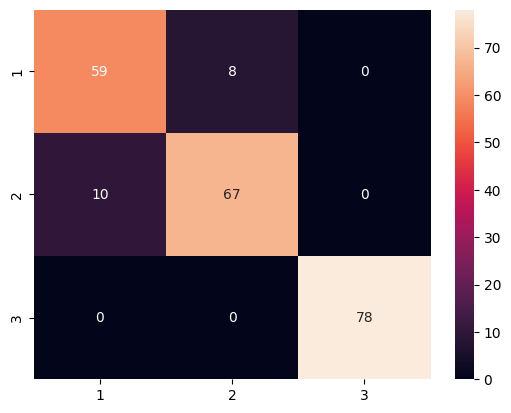

In [ ]:
#disini kita bisa liat dari confusion matrixnya kalau orang dengan level pengalamannya satu benar diprediksi dia level 1 sebanyak 59 kali
#dan salah diprediksi sebanyak 10 kali
#sama juga seperti yang kedua dia diprediksi dua sebanyak 67 dan salah diprediksi menjadi 1 sebanyak 8 kali
#dan untuk yang ketiga dia berhasil diprediksi bahwa dia adalah level 3 sebanyak 78 dan tidak ada yang salah
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=set_y, yticklabels=set_y)